## Ejercicios de la guía n°3 (800_Ejercicio_2)

Resolver el ejercicio n°1 en Python.  
Verificar las siguientes igualdades:

a. $ x(t) * \delta(t) = x(t) $  
b. $ x(t) * \delta(t - t_{0}) = x(t - t_{0}) $ 


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
t_final = 20
fs = 1000
t = np.arange(0,t_final,1/fs)
f = 1

xt = 2*np.cos(2*np.pi*f*t/12)  # Señal x(t)
d = np.append([1], np.zeros(len(xt)-1))  # Delta d(t)

y = np.convolve(xt,d)  # Señal convolucion entre x(t) y delta

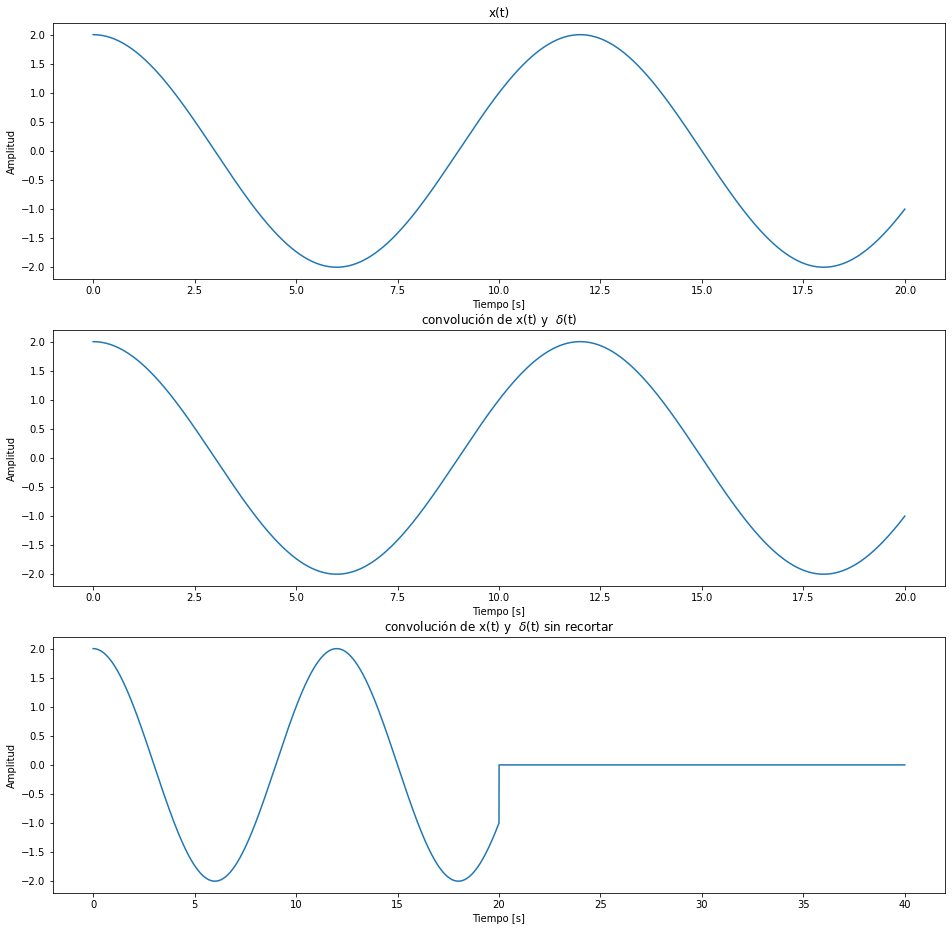

In [49]:
fig, ax = plt.subplots(3, frameon=False, figsize=(16, 16))

ax[0].plot(t, xt)
ax[0].set_title('x(t)')

ax[1].plot(t, y[0:len(t)])
ax[1].set_title('Convolución de x(t) y  $\delta$(t)')

t_aux = np.arange(0, t_final*2-1/fs, 1/fs)
ax[2].plot(t_aux, y)
ax[2].set_title('Convolución de x(t) y  $\delta$(t) sin recortar')

for i in range(0, 3):
    ax[i].set_ylabel('Amplitud')
    ax[i].set_xlabel('Tiempo [s]')


También puede verse esta igualdad usando *numpy.array_equal*. Sin embargo, en otros casos hay que tener cuidado el errorde precisión del punto flotante.

In [5]:
np.array_equal(xt, y[0:len(xt)])

True

In [7]:
xt_dis = np.append(np.zeros(fs), xt[0:len(xt)-fs])  # Señal desplazada 1 segundo

d_aux = np.append(np.zeros(fs),[1])  # Delta desplazada 1 segundo d(t-1)
d_dis = np.append(d_aux, np.zeros(len(xt) - len(d_aux)))

y_dis = np.convolve(xt,d_dis)  # Señal convolucion entre x(t) y delta desplazada 1 segundo

True

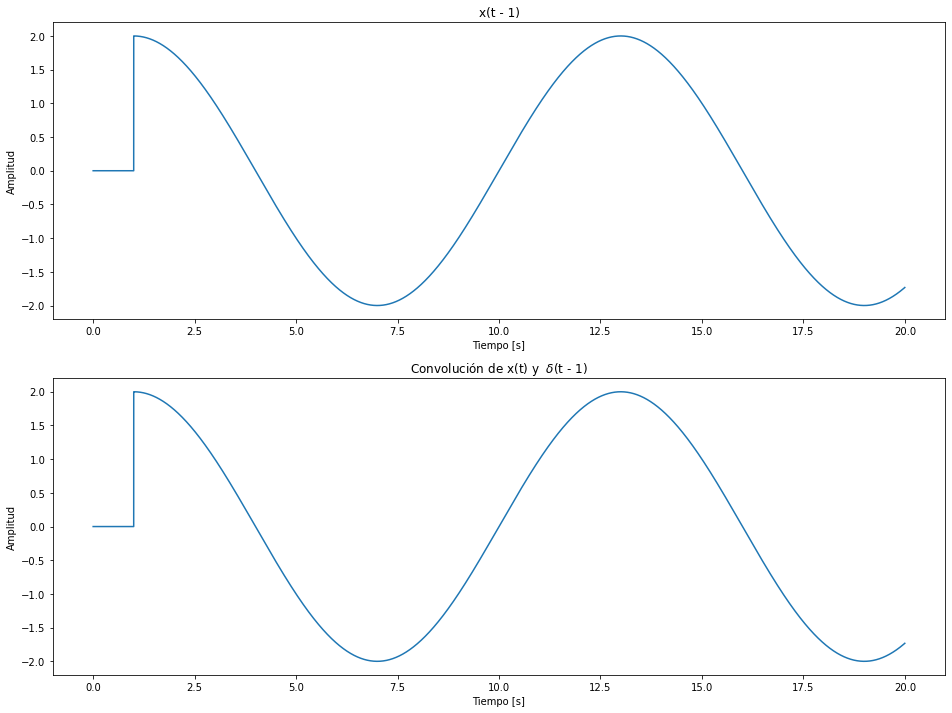

In [8]:
fig, ax = plt.subplots(2, frameon=False, figsize=(16, 12))

ax[0].plot(t, xt_dis)
ax[0].set_title('x(t - 1)')

ax[1].plot(t, y_dis[0:len(t)])
ax[1].set_title('Convolución de x(t) y  $\delta$(t - 1)')

for i in range(0, 2):
    ax[i].set_ylabel('Amplitud')
    ax[i].set_xlabel('Tiempo [s]')

np.array_equal(xt_dis, y_dis[0:len(t)])